In [1]:
import os, sys
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt

from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20, 10)
%matplotlib inline

from nilmtk.dataset_converters import convert_redd

from nilmtk import DataSet
from nilmtk.utils import print_dict

from tqdm import tqdm, tqdm_notebook

import warnings
warnings.filterwarnings(action="ignore")

# Coleta e limpeza dos dados

In [2]:
dataset_path = "datasets/REDD/low_freq"

windows_data_path = os.path.join(dataset_path, "../../phd")
if not os.path.isdir(windows_data_path):
    os.makedirs(windows_data_path)

dataset_file = "datasets/REDD/redd.h5"
if not os.path.isfile(dataset_file):
    convert_redd(dataset_path, dataset_file)

In [3]:
redd = DataSet(dataset_file)
print_dict(redd.metadata)

In [4]:
house_3 = redd.buildings[3]
print(house_3.elec)

MeterGroup(meters=
  ElecMeter(instance=1, building=3, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=3, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=3, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=3, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=5, building=3, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=6, building=3, dataset='REDD', appliances=[Appliance(type='CE appliance', instance=1)])
  ElecMeter(instance=7, building=3, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=8, building=3, dataset='REDD', appliances=[Appliance(type='waste disposal unit', instance=1)])
  ElecMeter(instance=9, building=3, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=3, dataset='REDD', appliances=[Appliance(ty

Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')      ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


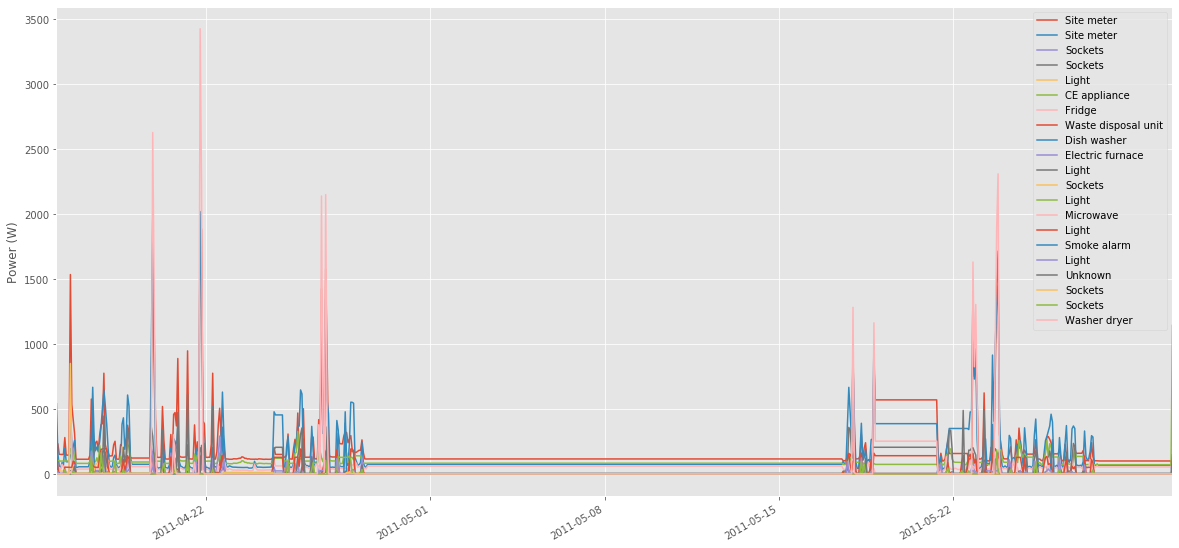

In [5]:
fig = plt.figure(figsize=(20, 10))
house_3.elec.plot();

In [6]:
# Amostras de Originais de Mains
house_3.elec.mains().power_series_all_data().head()

Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')      ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


2011-04-16 01:11:27-04:00    757.089966
2011-04-16 01:11:28-04:00    758.890015
2011-04-16 01:11:29-04:00    758.889954
2011-04-16 01:11:30-04:00    758.640015
2011-04-16 01:11:31-04:00    756.640015
Name: (power, apparent), dtype: float32

In [7]:
house_3.elec[1].power_series_all_data(sample_period=3).shape

(1290170,)

In [8]:
# Amostras de Originais de Aplpiance 3
house_3.elec[3].power_series_all_data().head()

2011-04-16 01:11:30-04:00    2.0
2011-04-16 01:11:33-04:00    1.0
2011-04-16 01:11:36-04:00    1.0
2011-04-16 01:11:40-04:00    2.0
2011-04-16 01:11:43-04:00    1.0
Name: (power, active), dtype: float32

In [9]:
house_3.elec[3].power_series_all_data(sample_period=3).shape

(1290163,)

**CONCLUSÃO PARCIAL:** É possível observar a diferenca de frequencias (mains e appliances, 1 e 3 segundos, respectivamente)

In [10]:
# Forçando taxa de 3 segundos para Mains
house_3.elec[1].power_series_all_data(sample_period=3).head()

2011-04-16 01:11:27-04:00    180.850006
2011-04-16 01:11:30-04:00    180.823334
2011-04-16 01:11:33-04:00    181.839996
2011-04-16 01:11:36-04:00    180.976669
2011-04-16 01:11:39-04:00    180.643341
Name: (power, apparent), dtype: float32

In [11]:
house_3.elec[1].power_series_all_data(sample_period=3).shape

(1290170,)

**CONCLUSÃO PARCIAL**: é possível normalizar as frequências, através do parâmetro `sample_period=SECOND_RATE`. Neste estudo, iremos `fixar esta taxa em 3 segundos`, tanto para as correntes princiais (medição geral - mains 1 e 2) quanto para os aparelhos.

Agora iremos verificar o intervalo de dados medidos, a fim de saber em quais momentos se iniciam e terminam os registros, tanto para `mains` quanto para os `appliances`.

In [12]:
sample_rate = 3

# Mains
print("Mains head: ")
display(house_3.elec[1].power_series_all_data(sample_period=sample_rate).head())
# Appliance 4
print("Appliance head: ")
display(house_3.elec[4].power_series_all_data(sample_period=sample_rate).head())

print("- "*33, "\n")
print("Mains tail:")
display(house_3.elec[1].power_series_all_data(sample_period=sample_rate).tail())

print("Appliance tail:")
display(house_3.elec[4].power_series_all_data(sample_period=sample_rate).tail())

Mains head: 


2011-04-16 01:11:27-04:00    180.850006
2011-04-16 01:11:30-04:00    180.823334
2011-04-16 01:11:33-04:00    181.839996
2011-04-16 01:11:36-04:00    180.976669
2011-04-16 01:11:39-04:00    180.643341
Name: (power, apparent), dtype: float32

Appliance head: 


2011-04-16 01:11:30-04:00    0.0
2011-04-16 01:11:33-04:00    0.0
2011-04-16 01:11:36-04:00    0.0
2011-04-16 01:11:39-04:00    0.0
2011-04-16 01:11:42-04:00    0.0
Name: (power, active), dtype: float32

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Mains tail:


2011-05-30 20:19:42-04:00    15.46
2011-05-30 20:19:45-04:00    15.43
2011-05-30 20:19:48-04:00    15.44
2011-05-30 20:19:51-04:00    15.47
2011-05-30 20:19:54-04:00    15.46
Name: (power, apparent), dtype: float32

Appliance tail:


2011-05-30 20:19:24-04:00    1.0
2011-05-30 20:19:27-04:00    1.0
2011-05-30 20:19:30-04:00    1.0
2011-05-30 20:19:33-04:00    1.0
2011-05-30 20:19:36-04:00    1.0
Name: (power, active), dtype: float32

**IMPORTANTE:** É possível observar algumas inconsitências quanto ao intervalo:

    1. O primeiro registro de  `mains` é anterior ao primeiro registro do `appliance;
    2. O último registro de `appliance` é anterior ao último de `mains`.
    
Neste caso, iremos deimiltar o início e o fim das medições com base no primeiro e último *timestamp* de `appliances`, sendo estes `2011-04-16 01:11:30` e `2011-05-30 20:19:36`, respectivamente.

In [13]:
redd.set_window(
    #start='2011-04-16 01:11:30', 
    #end='2011-05-30 20:19:36'
    start='2011-04-16 05:11:30',
    end='2011-04-23 08:43:26'
)
house_3 = redd.buildings[3]

In [14]:
# Mains
print("Mains head: ")
display(house_3.elec[1].power_series_all_data(sample_period=sample_rate).head())
# Appliance 4
print("Appliance head: ")
display(house_3.elec[4].power_series_all_data(sample_period=sample_rate).head())

print("- "*33, "\n")
print("Mains tail:")
display(house_3.elec[1].power_series_all_data(sample_period=sample_rate).tail())

print("Appliance tail:")
display(house_3.elec[4].power_series_all_data(sample_period=sample_rate).tail())

Mains head: 


2011-04-16 05:11:30-04:00    144.820007
2011-04-16 05:11:33-04:00    146.666672
2011-04-16 05:11:36-04:00    146.009995
2011-04-16 05:11:39-04:00    144.856674
2011-04-16 05:11:42-04:00    144.550003
Name: (power, apparent), dtype: float32

Appliance head: 


2011-04-16 05:11:33-04:00    0.0
2011-04-16 05:11:36-04:00    0.0
2011-04-16 05:11:39-04:00    0.0
2011-04-16 05:11:42-04:00    0.0
2011-04-16 05:11:45-04:00    0.0
Name: (power, active), dtype: float32

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

Mains tail:


2011-04-23 08:43:12-04:00    132.050003
2011-04-23 08:43:15-04:00    132.035004
2011-04-23 08:43:18-04:00    130.806671
2011-04-23 08:43:21-04:00    130.459991
2011-04-23 08:43:24-04:00    130.630005
Name: (power, apparent), dtype: float32

Appliance tail:


2011-04-23 08:43:09-04:00    0.0
2011-04-23 08:43:12-04:00    0.0
2011-04-23 08:43:15-04:00    0.0
2011-04-23 08:43:18-04:00    0.0
2011-04-23 08:43:21-04:00    0.0
Name: (power, active), dtype: float32

**CONCLUSÃO PARCIAL:** Neste momento, temos uma base de dados normalizada, seguindo os parâmetros:

    * Início das medições: 16/04/2011 às 01:11:30; 
    * Início das medições: 30/05/2011 às 20:19:36 (dependendo do tamanho da janela, definido posteriormente);
    * Taxa de amostragem: 3 segundos;
    * Residência: 3.

Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')      ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


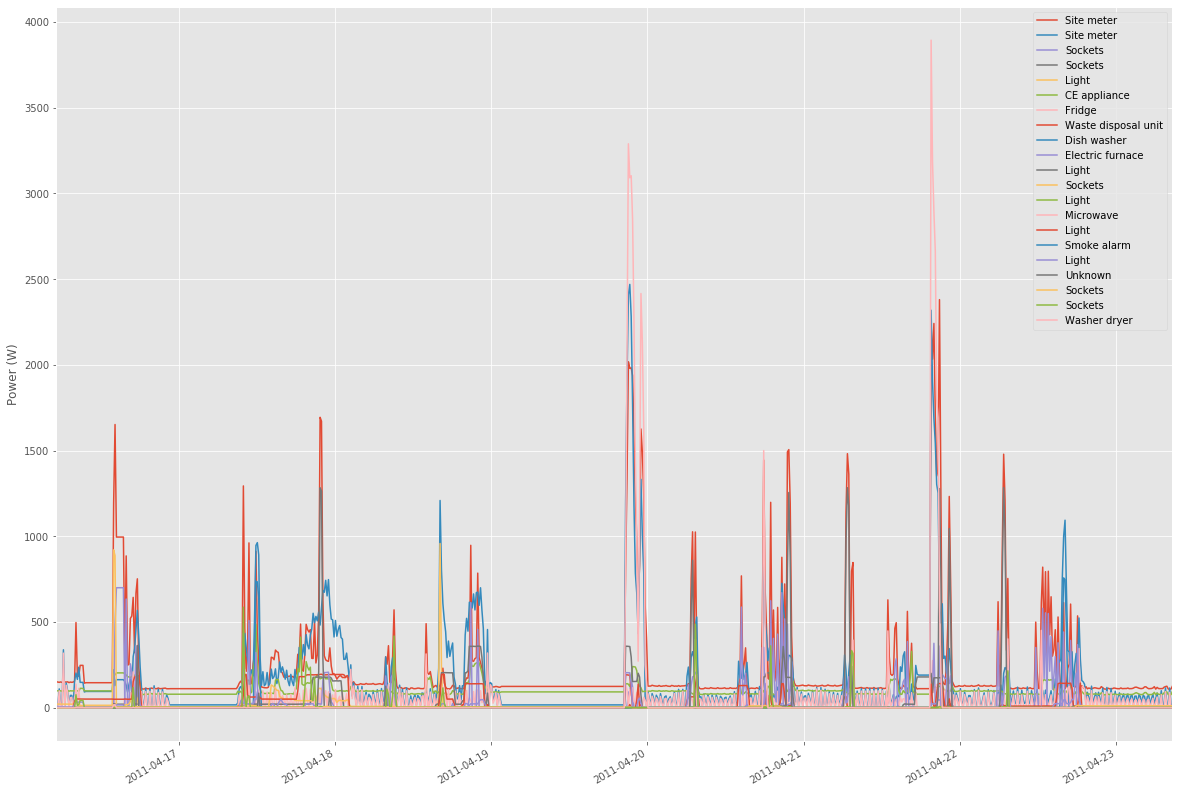

In [15]:
fig = plt.figure(figsize=(20, 15))
house_3.elec.plot();

Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')      ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


<Figure size 1440x1080 with 0 Axes>

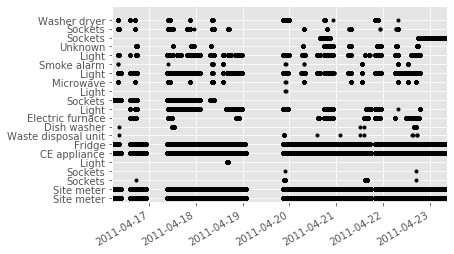

In [16]:
fig = plt.figure(figsize=(20, 15));
house_3.elec.plot_when_on();

# Preparação dos dados 
---

Com os dados normalizados, é necessário dividir as medições em janelas com submedições.

In [17]:
# Window size (5 minutes, after converted to seconds and divided by sample rate), 
# resulting in unit split of each chunk (window)
window_length = int((1.5 * 60) / sample_rate)
window_length

30

In [18]:
# Maximum size of series data (depending on window length)
series = house_3.elec.mains().power_series_all_data(sample_period=sample_rate)
series_limit = int(len(series.values)/window_length)*window_length
series_limit

Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')      ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


205830

In [19]:
start_timestamp = int(series.index[0].timestamp())
end_timestamp = int(series.index[series_limit].timestamp())

print("VALIDATED DATETIME INTERVAL:")
print()
print("- Initial datetime: {}".format( series.index[0].strftime(format="%d/%m/%Y %H:%M:%S") ) ) 
print("- Final datetime: {}".format( series.index[series_limit].strftime(format="%d/%m/%Y %H:%M:%S") )  )

VALIDATED DATETIME INTERVAL:

- Initial datetime: 16/04/2011 05:11:30
- Final datetime: 23/04/2011 08:43:00


Processing `Site meter` data (205830 rows)...
(6861, 30)
Processing `Site meter` data (205830 rows)...
(6861, 30)
Processing `Sockets` data (205830 rows)...
Processing `Sockets` data (205830 rows)...
Processing `Light` data (205830 rows)...
Processing `CE appliance` data (205830 rows)...
Processing `Fridge` data (205830 rows)...
Processing `Waste disposal unit` data (205830 rows)...
Processing `Dish washer` data (205830 rows)...
Processing `Electric furnace` data (205830 rows)...
Processing `Light` data (205830 rows)...
Processing `Sockets` data (205830 rows)...
Meter 13 is in a nested meter group. Retrieving just the ElecMeter.
Processing `Washer dryer` data (205830 rows)...
Meter 14 is in a nested meter group. Retrieving just the ElecMeter.
Processing `Washer dryer` data (205830 rows)...
Processing `Light` data (205830 rows)...
Processing `Microwave` data (205830 rows)...
Processing `Light` data (205830 rows)...
Processing `Smoke alarm` data (205830 rows)...
Processing `Light` data (

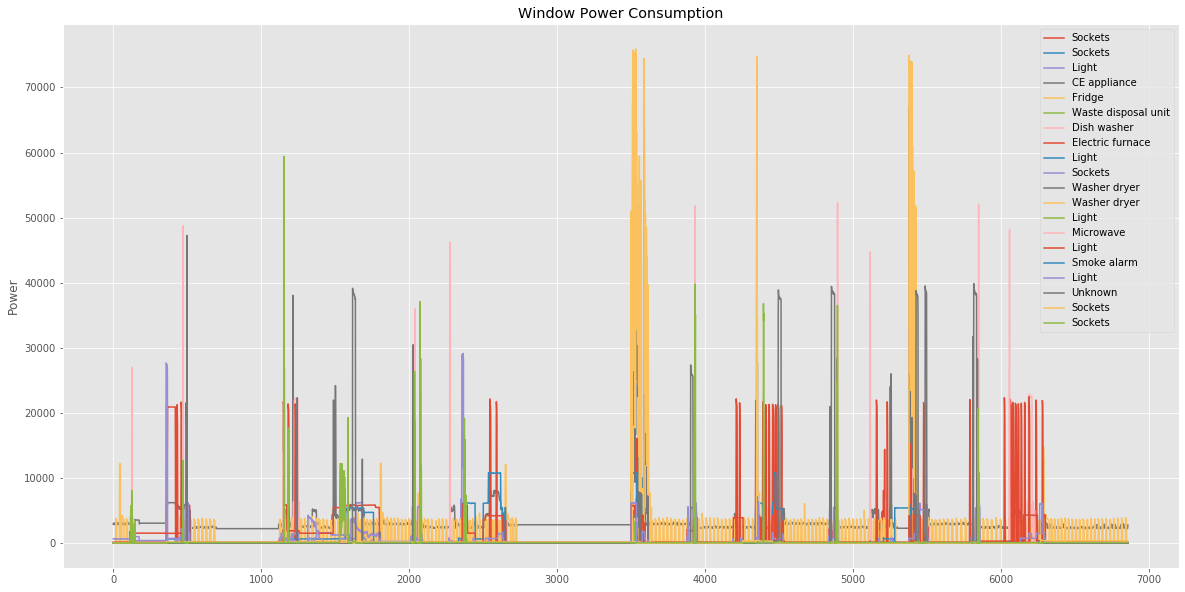

In [20]:
# Split and persist data...
fig = plt.figure(figsize=(20,10))
#for e in house_3.elec.all_meters():
for e_i in range(1, len(house_3.elec.all_meters())+2):
    
    e = house_3.elec[e_i]
    data = np.array(e.power_series_all_data(sample_period=sample_rate).values[:series_limit])
    
    print("Processing `{}` data ({} rows)...".format(e.label(), data.shape[0]))
    
    # Split series in windows
    data = data.reshape(-1, window_length)
    # 
    if e.label() == "Site meter":
        
        print(data.shape)
        np.save(
            os.path.join(
                windows_data_path, 
                "{}-{}.npy".format(
                    e.instance(),
                    e.label().lower().replace(" ","_")
                )
            ),
            data
        )
        
    else:
        # Appliance total energy in window
        data = np.sum(data, axis=1)
        np.save(
            os.path.join(
                windows_data_path, 
                "{}-{}_total.npy".format(
                    e.instance(),
                    e.label().lower().replace(" ","_")
                )
            ),
            data
        )
        
        # ON/OFF status (1 if sum > 0 else 0)
        data_binary = np.where(data > 0, 1, 0)
        np.save(
            os.path.join(
                windows_data_path, 
                "{}-{}_binary.npy".format(
                    e.instance(),
                    e.label().lower().replace(" ","_")
                )
            ),
            data_binary
        )
        plt.plot(data, label=e.label())

plt.title("Window Power Consumption");
plt.ylabel("Power");
plt.legend();

**CONCLUSÃO:** Por fim, foram exportados 43.005 amostras, contemplando as janelas de 1 minuto e meio (90 segundos) de medição.

# Adicional: Checando os Top-5 aparelhos que consomem energia

19/19 MeterGroup(meters==22, building=3, dataset='REDD', appliances=[Appliance(type='sockets', instance=5)])1)])1)])])
  ElecMeter(instance=13, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=14, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=13, building=3, dataset='REDD') ...    total_energy for ElecMeterID(instance=14, building=3, dataset='REDD') ...   

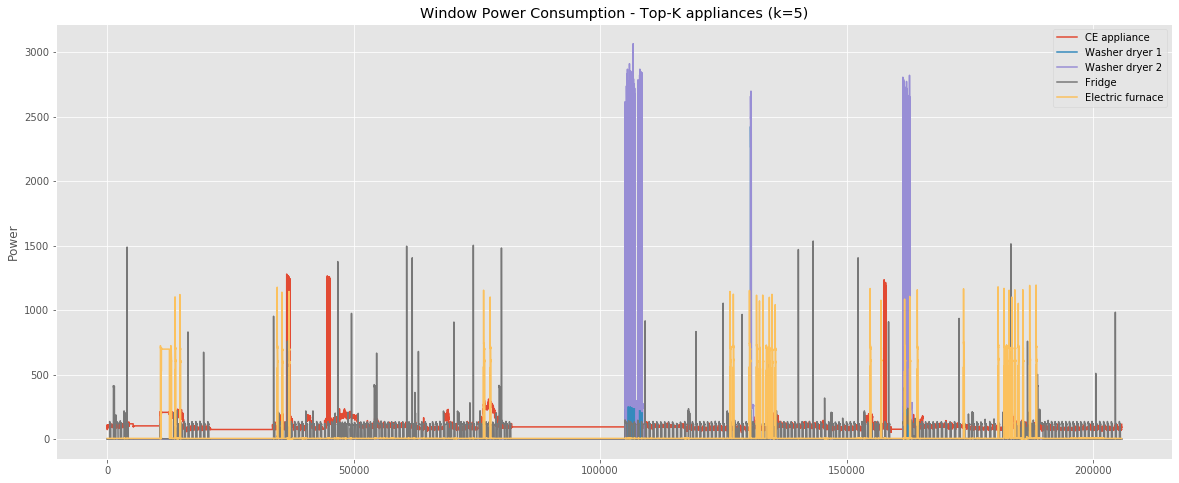

In [21]:
fig = plt.figure(figsize=(20,8))

k_ = 5
appliances = []
top_appliances = house_3.elec.submeters().select_top_k(k=k_)
for e_i in range(len(top_appliances.all_meters())):
    
    if len(appliances) < k_:                 
        elec = top_appliances.all_meters()[e_i]
        if hasattr(elec, 'meters'):
            for i, e in enumerate(elec.meters):
                appliance_name = "{} {}".format(e.label(), i+1)
                data = np.array(e.power_series_all_data(sample_period=sample_rate).values[:series_limit])
                plt.plot(data, label=appliance_name)
                appliances.append({"channel": e.instance(), "name": appliance_name})
        else:
            data = np.array(elec.power_series_all_data(sample_period=sample_rate).values[:series_limit])
            plt.plot(data, label=elec.label())
            appliances.append({"channel": elec.instance(), "name": elec.label()})
    else:
        break

plt.title("Window Power Consumption - Top-K appliances (k={})".format(k_));
plt.ylabel("Power");
plt.legend();

In [22]:
appliances

[{'channel': 6, 'name': 'CE appliance'},
 {'channel': 13, 'name': 'Washer dryer 1'},
 {'channel': 14, 'name': 'Washer dryer 2'},
 {'channel': 7, 'name': 'Fridge'},
 {'channel': 10, 'name': 'Electric furnace'}]

In [23]:
import joblib
joblib.dump(appliances,os.path.join(windows_data_path, "appliances.pkl"))

['datasets/REDD/low_freq\\../../phd\\appliances.pkl']

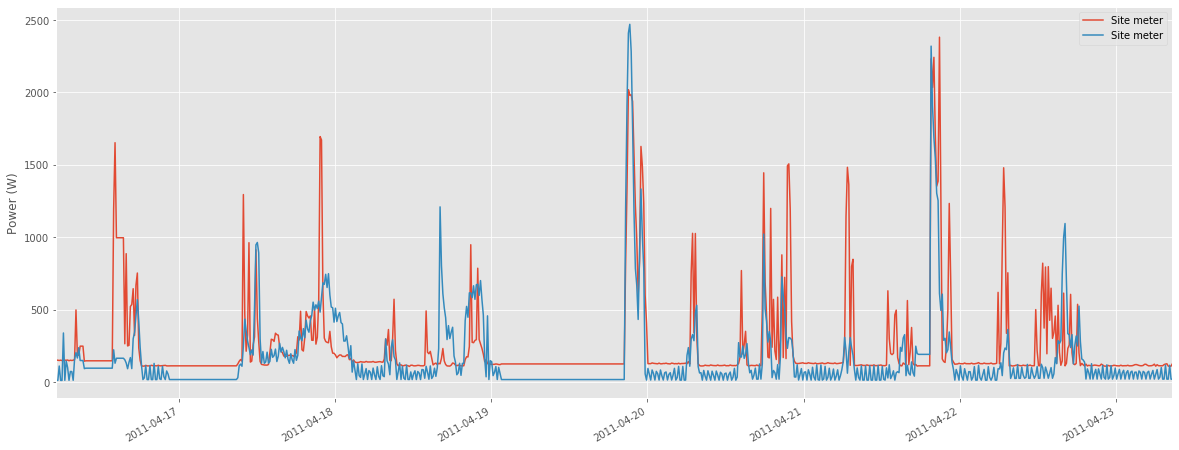

In [24]:
fig = plt.figure(figsize=(20,8))
house_3.elec.mains().plot();